In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom as pdicom
import os
import scipy.ndimage
import matplotlib.pyplot as plt
import glob
import cv2

from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [2]:
data_dir='DOI'
patients = os.listdir(data_dir)
patients.sort()

In [3]:
labels_df= pd.read_csv('calc_case_description_test_set.csv',index_col=0)

In [4]:
labels_df.head(10)

,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
patient_id,,,,,,,,,,,,,
P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...
P_00038,2,RIGHT,MLO,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_2/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_2/1.3.6.1.4.1.9590...
P_00041,1,LEFT,CC,2,calcification,LUCENT_CENTER,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00041_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00041_LEFT_CC_2/1.3.6.1.4.1.9590.1...,Calc-Test_P_00041_LEFT_CC_2/1.3.6.1.4.1.9590.1...
P_00041,1,LEFT,MLO,2,calcification,LUCENT_CENTER,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00041_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00041_LEFT_MLO_2/1.3.6.1.4.1.9590....,Calc-Test_P_00041_LEFT_MLO_2/1.3.6.1.4.1.9590....
P_00077,2,LEFT,CC,1,calcification,ROUND_AND_REGULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Test_P_00077_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00077_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00077_LEFT_CC_1/1.3.6.1.4.1.9590.1...


In [ ]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, P_00038 to P_02501
Data columns (total 13 columns):
breast density             326 non-null int64
left or right breast       326 non-null object
image view                 326 non-null object
abnormality id             326 non-null int64
abnormality type           326 non-null object
calc type                  322 non-null object
calc distribution          263 non-null object
assessment                 326 non-null int64
pathology                  326 non-null object
subtlety                   326 non-null int64
image file path            326 non-null object
cropped image file path    326 non-null object
ROI mask file path         326 non-null object
dtypes: int64(4), object(9)
memory usage: 35.7+ KB


In [ ]:

x=labels_df.groupby('patient_id')['ROI mask file path'].unique()[43]
loc=data_dir+'/'+x[0]
redf=pdicom.read_file(loc[:])

# output=(int(input*255)/65535).astype(uint8)
img=((redf.pixel_array/65535)*255).astype(np.uint8)

#plt.imshow(img,cmap=plt.cm.bone)
cv2.imshow('im1',img)
cv2.imshow('im2',redf.pixel_array)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(0)
#plt.show()

print(redf)
#ConstPixelDims=(int(redf.Rows),int(redf.Columns),len(x))
#ConstPixelSpacing=(float(redf.PixelSpacing[0]),float(redf.PixelSpacing[1]),
              #     float(redf.SliceThickness))

In [4]:
x=labels_df.groupby('patient_id')['cropped image file path'].unique()[0]
x

array([ 'Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.100.1.2.161465562211359959230647609981488894942/1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515/000001.dcm\n',
       'Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.29112199613143138535387754440942211739/1.3.6.1.4.1.9590.100.1.2.188613955710170417803011787532523988680/000001.dcm\n',
       'Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590.100.1.2.200764632211227648028305709420627883105/1.3.6.1.4.1.9590.100.1.2.244876997513875090239564803900035037851/000001.dcm\n',
       'Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590.100.1.2.248538452013626298441249276382187367143/1.3.6.1.4.1.9590.100.1.2.360550081712464813321995483083632007570/000001.dcm\n',
       'Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590.100.1.2.348569460311013218440657632223354965172/1.3.6.1.4.1.9590.100.1.2.126295284812046209819441424913058621714/000001.dcm\n',
       'Calc-Test_P_00038_RIGHT_MLO_2/1.3.6.1.4.1.9590.100.1.2.573626950127809277210088847

In [7]:
#cropped images

import mahotas as mh

x=labels_df.groupby('patient_id')['image file path'].unique()[19]
loc=data_dir+'/'+x[0]
redf=pdicom.read_file(loc[:])
img=((redf.pixel_array/65535)*255).astype(np.uint8)

print(mh.features.haralick(img).mean(0))
img=redf.pixel_array
print(mh.features.haralick(img).mean(0))


[  1.98860112e-01   3.44508502e+00   9.99420047e-01   2.97028344e+03
   6.85315088e-01   9.84030278e+01   1.18776887e+04   5.55824358e+00
   6.72595689e+00   1.42448462e-03   1.93620373e+00  -6.46145535e-01
   9.99135421e-01]


KeyboardInterrupt: 

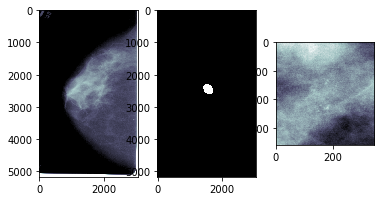

The cropped image's size is (361, 345) 

[  1.94465751e-03   6.53148526e+00   9.92370374e-01   4.28265684e+02
   3.83046579e-01   3.99923144e+02   1.70653125e+03   7.23664611e+00
   9.57740421e+00   7.81286219e-04   2.52536355e+00  -4.65817240e-01
   9.98337217e-01]


In [5]:
import mahotas as mh
pat=7
x=labels_df.groupby('patient_id')['image file path'].unique()[pat]
y=labels_df.groupby('patient_id')['cropped image file path'].unique()[pat]
z=labels_df.groupby('patient_id')['ROI mask file path'].unique()[pat]
loc1=data_dir+'/'+x[0]
loc2=data_dir+'/'+y[0]
loc3=data_dir+'/'+z[0]
i1=pdicom.read_file(loc1[:])
i2=pdicom.read_file(loc2[:-1])
i3=pdicom.read_file(loc3[:])
#print(i1,'\n')
#print(i2,'\n')
#print(i3,'\n')
img1=i1.pixel_array
img2=i2.pixel_array
img3=i3.pixel_array

plt.subplot(131).imshow(img1,cmap=plt.cm.bone)
plt.subplot(132).imshow(img2,cmap=plt.cm.bone)
plt.subplot(133).imshow(img3,cmap=plt.cm.bone)
plt.show()
print('The cropped image\'s size is',img3.shape,'\n')
img1=((img3/65535)*255).astype(np.uint8)
print(mh.features.haralick(img1).mean(0))